In [24]:
import pandas as pd

# First, we need to load the dataset
data = pd.read_csv('C:/Users/Onbayeva_Sabira/Desktop/final_project/data/used_cars_2cities.csv')

# Inspecting the first few rows and summary info
print(data.head())
print(data.info())
print(data.describe(include='all'))  # Include all columns to see non-numeric summaries as well

   v1   price     area       subarea                      name  condition  \
0   1   $4990  chicago  chicago city  2007 Toyota Camry Hybrid       good   
1   2  $10625  chicago  chicago city  2009 Toyota Camry Hybrid        NaN   
2   3     NaN  chicago  chicago city         2010 Toyota Camry  excellent   
3   4  $14850  chicago  chicago city       2015 Toyota_ Camry_  excellent   
4   5  $15630  chicago  chicago city         2016 TOYOTA CAMRY        NaN   

     cylinders drive    fuel  odometer paintcolor      size transmission  \
0  4 cylinders   fwd     gas  116236.0       grey       NaN    automatic   
1  4 cylinders   fwd  hybrid   43702.0       grey       NaN    automatic   
2          NaN   fwd     gas  140437.0      white  mid-size          NaN   
3        other   NaN     gas   35721.0        NaN       NaN    automatic   
4          NaN   fwd     gas   13152.0        NaN       NaN    automatic   

    type  dealer  
0  sedan       1  
1  sedan       1  
2  sedan       1  
3  s

In [25]:
# I would like to define the columns to clean and their unwanted symbols
columns_to_clean = {
    'price': '$',         # Remove $ from price
    'cylinders': ' cylinders'  # Remove "cylinders" from cylinders
}

# Let's automate the cleaning with a loop
for col, symbol in columns_to_clean.items():
    data[col] = data[col].str.replace(symbol, '', regex=False)

In [27]:
# Replacing 'NA' with NaN
data.replace("NA", pd.NA, inplace=True)

# Dropping rows with missing values in key columns
columns_with_missing = ['price', 'subarea', 'condition', 'cylinders', 'drive', 'paintcolor', 'size', 'type', 'odometer']
data.dropna(subset=columns_with_missing, inplace=True)

In [29]:
# Converting odometer, price, and cylinders to numeric
data['odometer'] = pd.to_numeric(data['odometer'], errors='coerce')
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data['cylinders'] = pd.to_numeric(data['cylinders'], errors='coerce')

In [31]:
# Filtering for cars under $10,000
data = data[data['price'] < 10000]

# I would like to select a subset of columns for analysis
data = data[['price', 'odometer', 'cylinders', 'condition', 'type']]

In [33]:
# Adding a new column for price per mile
data['price_per_mile'] = data['price'] / data['odometer']

In [19]:
# Saving the cleaned data
data.to_csv('C:/Users/Onbayeva_Sabira/Desktop/final_project/data/filtered_sample.csv', index=False)

In [36]:
# Creating Summary Statistics and a Graph

summary_stats = data.describe()
summary_stats.to_csv('C:/Users/Onbayeva_Sabira/Desktop/final_project/output/tables/summary_statistics.csv')
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Frequency')

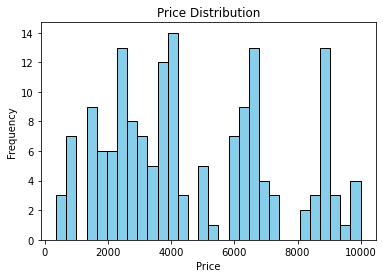

In [42]:
import matplotlib.pyplot as plt

plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [ ]:
# Let's save the plot to the output/graphs folder
plt.savefig("C:/Users/Onbayeva_Sabira/Desktop/final_project/output/graphs/price_distribution.png", format='png', dpi=300, bbox_inches='tight')
plt.close() 